In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from itertools import combinations 

C:\Users\Derrick\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [25]:
data = os.path.join('datasets', 'coverage_metrics.csv')

df = pd.read_csv(data, parse_dates=[0], index_col=0, squeeze=True)

df.head(10)

,assets,capital,deposits,loans,dep_gth,loan_gth,ldr,asset_eq,pct_eq
2007-09-01,1722214.974,195163.3326,1328739.152,7.934292e+05,NaN,NaN,0.597129,8.824480,0.113321
2007-12-01,1824618.280,203537.8667,1411980.995,8.758401e+05,NaN,NaN,0.620292,8.964515,0.111551
2008-03-01,1762574.572,193537.8786,1354084.015,8.225869e+05,NaN,NaN,0.607486,9.107130,0.109804
2008-06-01,1886282.583,182885.2745,1444970.528,9.223723e+05,NaN,NaN,0.638333,10.314021,0.096955
2008-09-01,1952753.324,185108.6858,1534162.784,9.821807e+05,0.154600,0.237893,0.640206,10.549226,0.094794
2008-12-01,2094914.758,184711.5024,1683707.544,1.052899e+06,0.192443,0.202158,0.625345,11.341550,0.088171
2009-03-01,2044417.984,194072.2472,1635570.416,1.064028e+06,0.207880,0.293515,0.650555,10.534314,0.094928
2009-06-01,2106329.205,203847.8209,1658932.289,1.119594e+06,0.148073,0.213820,0.674888,10.332851,0.096779
2009-09-01,2082715.644,212006.3140,1637628.339,1.060154e+06,0.067441,0.079388,0.647372,9.823838,0.101793
2009-12-01,2248071.207,219787.7519,1792174.265,1.166293e+06,0.064421,0.107697,0.650770,10.228373,0.097767


In [26]:
df = df.drop(['assets', 'capital', 'loans', 'deposits'], axis=1).dropna()

print(df.shape)

df.head()

(52, 5)


,dep_gth,loan_gth,ldr,asset_eq,pct_eq
2008-09-01,0.154600,0.237893,0.640206,10.549226,0.094794
2008-12-01,0.192443,0.202158,0.625345,11.341550,0.088171
2009-03-01,0.207880,0.293515,0.650555,10.534314,0.094928
2009-06-01,0.148073,0.213820,0.674888,10.332851,0.096779
2009-09-01,0.067441,0.079388,0.647372,9.823838,0.101793


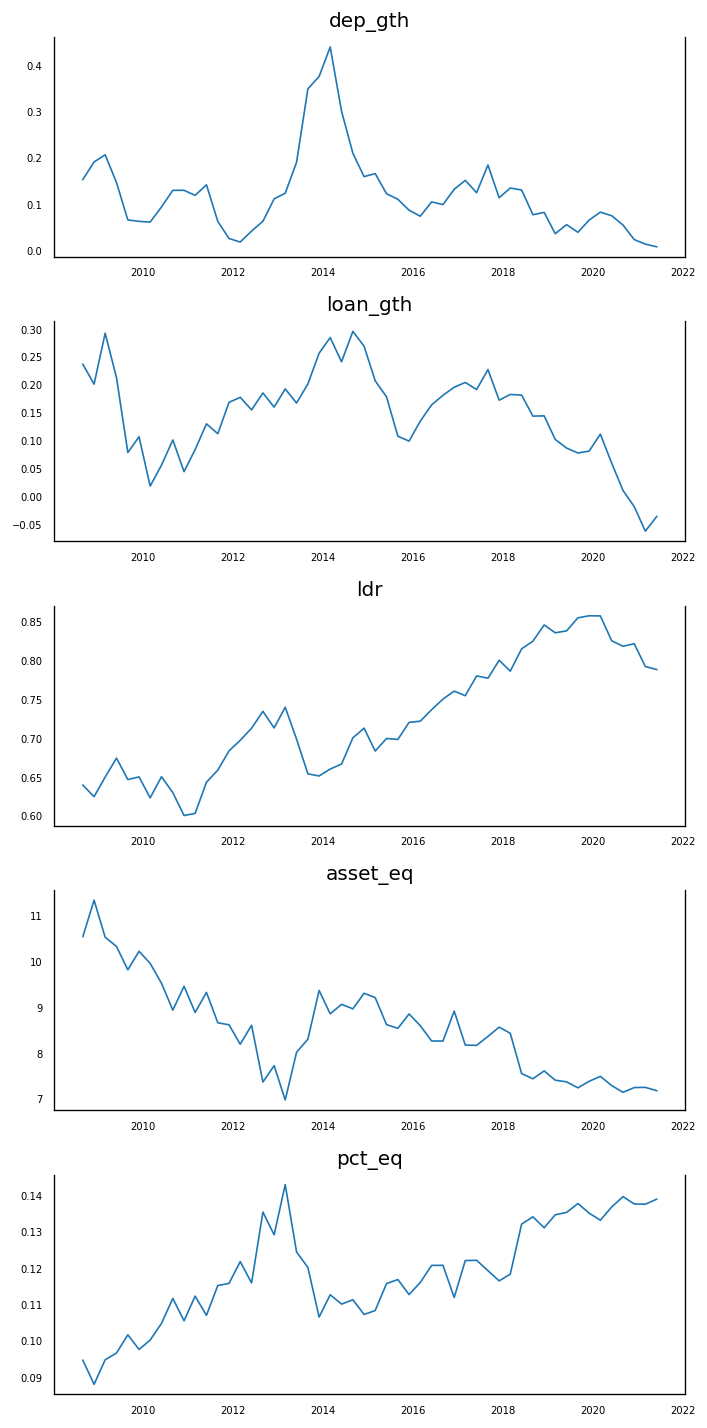

In [27]:
# visualize

fig, axes = plt.subplots(nrows=5, ncols=1, dpi=120, figsize=(6,12))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='tab:blue', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [28]:
df_st = (df-df.mean())/df.std() 

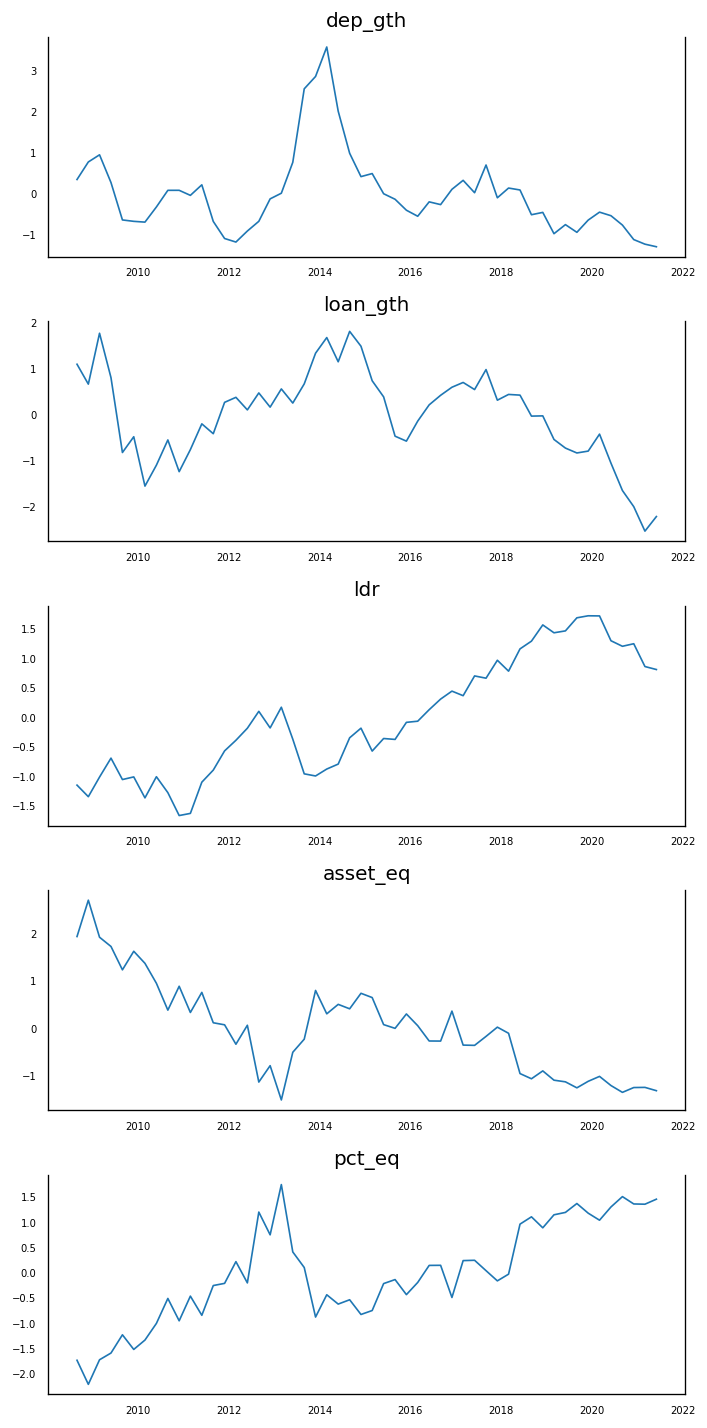

In [29]:
# visualize

fig, axes = plt.subplots(nrows=5, ncols=1, dpi=120, figsize=(6,12))
for i, ax in enumerate(axes.flatten()):
    data = df_st[df_st.columns[i]]
    ax.plot(data, color='tab:blue', linewidth=1)
    # Decorations
    ax.set_title(df_st.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [30]:
df_st.corr()

,dep_gth,loan_gth,ldr,asset_eq,pct_eq
dep_gth,1.000000,0.681507,-0.416819,0.369073,-0.395763
loan_gth,0.681507,1.000000,-0.267293,0.379002,-0.408638
ldr,-0.416819,-0.267293,1.000000,-0.793395,0.812545
asset_eq,0.369073,0.379002,-0.793395,1.000000,-0.991066
pct_eq,-0.395763,-0.408638,0.812545,-0.991066,1.000000


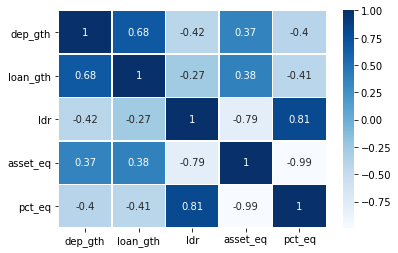

In [31]:
sns.heatmap(df_st.corr(), cmap = "Blues", linewidths = 0.30, annot = True)